# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [40]:
# importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

#carregando o arquivo
df_prev_renda = pd.read_csv('previsao_de_renda.csv')
#df_prev_renda.shape
df_prev_renda.dropna(axis=0, inplace=True)
df_prev_renda
#df_prev_renda.shape

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


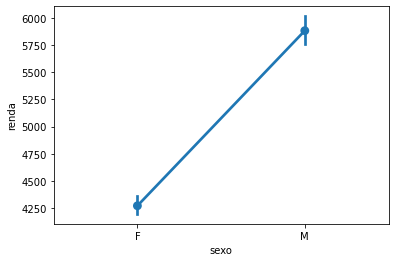

In [41]:
ax=sns.pointplot(x='sexo', y='renda', data=df_prev_renda, dodge=True, ci=90)

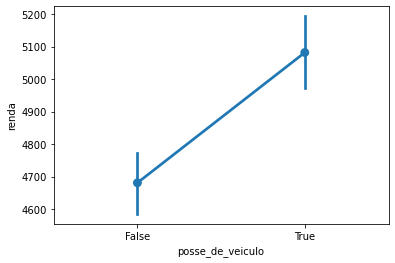

In [42]:
ax=sns.pointplot(x='posse_de_veiculo', y='renda', data=df_prev_renda, dodge=True, ci=90)

Podemos perceber pelos gráficos acima que a população de sexo Masculino ganha consideravelmente acima da população de sexo feminino. Também percebemos que a população que tem posse de carro também tem uma renda consideravelmente superior a quem não tem carro.

 Resolvi entender um pouco melhor a questão juntando as 2 variáveis no mesmo gráfico (Gráfico abaixo), percebemos que as pessoas de sexo masculino que possuem veículos tem uma renda um pouco menor dos que não possuem. Para as pessoas de sexo feminino, a renda é quase a mesma independentemente se elas possuem ou não carros.


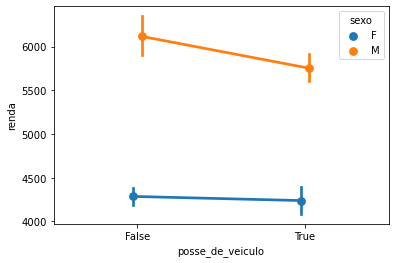

In [44]:
ax=sns.pointplot(x='posse_de_veiculo', y='renda', hue = 'sexo', data=df_prev_renda, dodge=True, ci=90)

In [63]:
#x= df_prev_renda[(df_prev_renda['sexo']=='M') & (df_prev_renda['posse_de_veiculo']==True)].copy()
y=df_prev_renda.groupby(['sexo','posse_de_veiculo'])['renda'].agg([('contar','count'), ('Media', 'mean')])
print(y)

                       contar        Media
sexo posse_de_veiculo                     
F    False               5661  4286.475257
     True                2330  4239.291579
M    False               1554  6118.920270
     True                2921  5754.391048
